In [1]:
"""
Support Vector Machine
1.Build a machine learning model to predict user will click the ad or not based on his experience and 
estimated salary for a given dataset.
"""

'\nSupport Vector Machine\n1.Build a machine learning model to predict user will click the ad or not based on his experience and \nestimated salary for a given dataset.\n'

In [2]:
#import libraries
import pandas as pd
import seaborn as sb
#libarry for feature scaling
from sklearn.preprocessing import StandardScaler
# #Classification library
from sklearn.svm import SVC
import pickle 
import os, sys
import csv
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [4]:
# load dataset
dataset_original = pd.read_csv ("Social_Network_Ads.csv")
dataset = dataset_original
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 400 rows and 5 Columns


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# check for duplicate values
dataset.duplicated().sum()

0

In [10]:
#categorical data
type(dataset.Gender)

pandas.core.series.Series

In [11]:
#Check categpries for categorical data
dataset.Gender[:5]

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

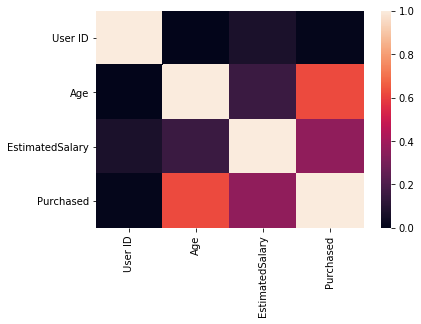

In [12]:
#Display heatmap to show correlation between diff variables
corr = dataset.corr()
sb.heatmap(corr)

Skewness of y is 0.596902836080957


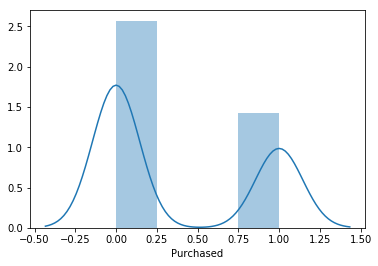

In [13]:
# check skewness for target variable
sb.distplot(dataset['Purchased'])
print ("Skewness of y is {}".format(dataset['Purchased'].skew()))

In [14]:
print (corr['Purchased'].sort_values(ascending=False)[:10], '\n') #top 10 values
print ('----------------------')
print (corr['Purchased'].sort_values(ascending=False)[-5:]) #last 5 values`


Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64 

----------------------
Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64


In [15]:
# create directory to store csv files
# os.mkdir("CSV_files")

In [16]:
#split dataset into train, test and cross validation also save csv files
obj_util.splitdata(dataset, 0.30, 0.40,"CSV_files" )

train :  (280, 5)  test :  (120, 5)
train_data :  (168, 5)  crossV_data :  (112, 5)


In [17]:
# load train dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Train Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 
# load dataset for Cross Validation
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Cross validation Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Train Dataset has 168 rows and 5 Columns
Cross validation Dataset has 112 rows and 5 Columns


In [18]:
#data Preprocessing
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
User ID            168 non-null int64
Gender             168 non-null object
Age                168 non-null int64
EstimatedSalary    168 non-null int64
Purchased          168 non-null int64
dtypes: int64(4), object(1)
memory usage: 6.6+ KB


In [19]:
# seperate fetures and label

# features -> age and estimated salary
x_train = train_dataset.iloc[:,[2,3]].values
# label -> purchased
y_train = train_dataset.iloc[:,4].values  

# Dont reshape any variable it gives error for visualisation "IndexError: too many indices for array"
# y_train = y_train.reshape(-1,1)
print("x_train :",x_train.shape,"& y_train:",y_train.shape)

#for cross validation
# features -> age and estimated salary
x_crossval = CV_dataset.iloc[:,[2,3]].values
# label -> purchased
y_crossval = CV_dataset.iloc[:,4].values  

print("x_cv :",x_crossval.shape,"& y_cv:",y_crossval.shape)

x_train : (168, 2) & y_train: (168,)
x_cv : (112, 2) & y_cv: (112,)


In [20]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_train,x_crossval):
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    
    sc_x_cv = StandardScaler()
    x_crossval = sc_x.fit_transform(x_crossval)
    return sc_x, x_train,sc_x_cv, x_crossval
    
sc_x, x_train,sc_x_cv, x_crossval = feature_scalling(x_train,x_crossval)

In [21]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [32]:
# x_train


Module created
classifier object SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


 y_prediction: [0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1]
(168,)


Average accuracy_score: 81.54761904761905
Average precision-recall score: 70.45
Average Roc-AUC: 80.102


Confusion Matrix:
 [[87 11]
 [20 50]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


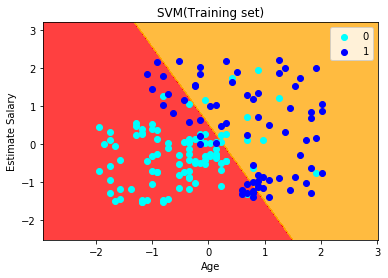

ROC Curve


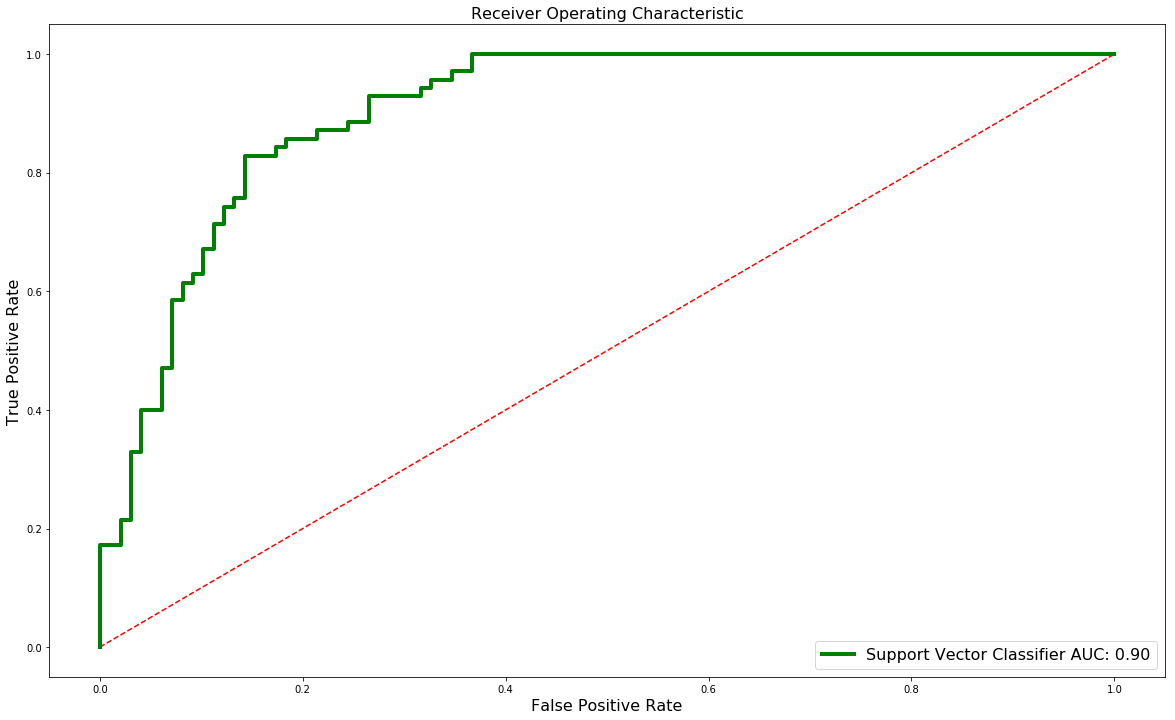

CAP Curve

 Accuracy Rate for Support Vector Classifier: 0.8081632653061225
class_1_observed 87.14285714285714

Pikle file created


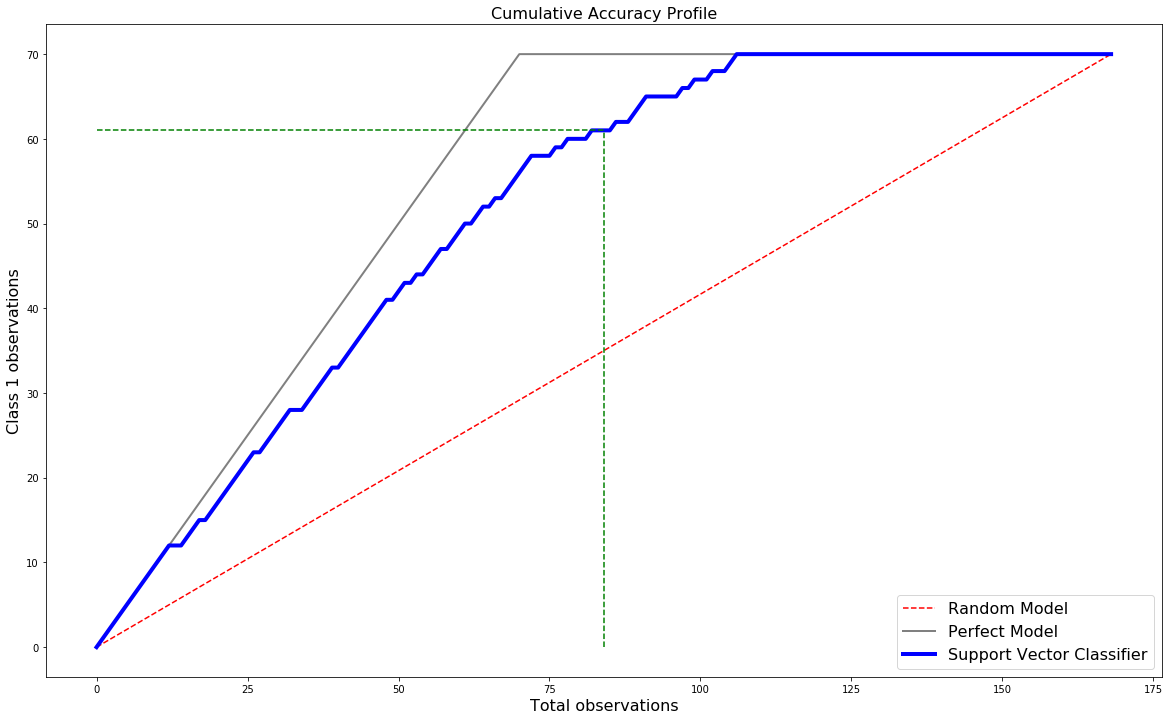

In [33]:
class SVM_sklearn():
    
    def create_module(self,x_train,y_train):
        # fitting LogisticRegression to the training set
        classifier = SVC(kernel= 'linear',random_state=0, probability=True)
        classifier.fit(x_train,y_train)
        return classifier

    # ROC(Receive operator Characteristic) Curve
    def visualizationROC(self, x_train,y_train,classifier):
        #figure size as 20x12 and create a base line from (0,0) to (1,1)
        # The value r-- indicates that the colour of the line is red 
        # and it is a dashed line ( — — — — — — — — — — — — — ).
        plt.figure(figsize = (20, 12))
        # Random Model
        plt.plot([0,1], [0,1], 'r--')

        #Calculate probabilities and determine TPR and FPR
#         probs = classifier.predict(x_train)
        probs = classifier.predict_proba(x_train)
        # Reading probability of second class (Salary >= $200K)
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(y_train, probs)
        roc_auc = auc(fpr, tpr)
        
        label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
        plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
        plt.xlabel('False Positive Rate', fontsize = 16)
        plt.ylabel('True Positive Rate', fontsize = 16)
        plt.title('Receiver Operating Characteristic', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
        plt.show()
        
     # CAP(Commulative Accuracy profile) Curve
    """The CAP Curve tries to analyse how to effectively identify all data points 
    of a given class using minimum number of tries"""
    
    def visualizationCAP(self, x_train,y_train,classifier):
        total = len(y_train)
        ## 168
        class_1_count = np.sum(y_train)
        ## 70
        class_0_count = total - class_1_count
        ## 98
        plt.figure(figsize = (20, 12))
        
        #Random Model
        plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
        
        #Perfect Model
        plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
        
        #Trained Model (Support Vector Classifier)
        probs = classifier.predict_proba(x_train)
        
        probs = probs[:, 1]
        model_y = [y for _, y in sorted(zip(probs, y_train), reverse = True)]
        y_values = np.append([0], np.cumsum(model_y))
        x_values = np.arange(0, total + 1)
        
        plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier', linewidth = 4)
        # Plot information
        plt.xlabel('Total observations', fontsize = 16)
        plt.ylabel('Class 1 observations', fontsize = 16)
        plt.title('Cumulative Accuracy Profile', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
        
        # Area under Random Model
        a = auc([0, total], [0, class_1_count])
        # Area between Perfect and Random Model
        aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
        # Area between Trained and Random Model
        aR = auc(x_values, y_values) - a
        print("\n Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))
       
        """CAP Analysis using Plot
        Another method to analyse the CAP Curve involves reading the plot we generated above"""
        # Point where vertical line will cut trained model
        index = int((50*total / 100))

        ## 50% Verticcal line from x-axis
        plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

        ## Horizontal line to y-axis from prediction model
        plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

        class_1_observed = y_values[index] * 100 / max(y_values)
        print("class_1_observed", class_1_observed)
        
    # Learning curve
    def visualization1(self,lg, x,y, y_train_pre):
#         x = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
        print(x.shape)
        # np.random.normal(scale=2,size=size) creates a 1000 x 1 matrix
        # scale=2 is the standard deviation of the distribution
#         np.random.normal(scale=2,size=size).shape
#         y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])
        print(y.shape)
        # Visualization the training set result
        train_sizes, train_scores, test_scores = learning_curve(lg, x, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title("Random_forest Classification")
        plt.legend(loc="best")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.gca().invert_yaxis()

        # box-like grid
        plt.grid()

        # plot the std deviation as a transparent range at each training set size
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

        # plot the average training and test score lines at each training set size
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        # sizes the window for readability and displays the plot
        # shows error from 0 to 1.1
        plt.ylim(-.1,1.1)
        plt.show()
    
def main():
    #class obj created
    obj  = SVM_sklearn()

    # create SVM Module
    classifier = obj.create_module(x_train,y_train)
    print("\nModule created")
    print("classifier object",classifier)

    # y prediction
    y_pre = obj_util.y_prediction(x_train, classifier)
    print("\n\n y_prediction:",y_pre)
    print(y_pre.shape)
    
    # calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_train)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_train,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
    # data visualisation
    obj_util.visualization(x_train,y_train, classifier, "SVM(Training set)", 
                           "Age", "Estimate Salary")
    print("ROC Curve")
    obj.visualizationROC(x_train,y_train,classifier)
    
    print("CAP Curve")
    obj.visualizationCAP(x_train,y_train,classifier)
    
    # create pickle file
    obj_util.create_piklefile(classifier,'SVM.pkl' )
    print("\nPikle file created")


if __name__ == '__main__':
    main()




 y_prediction: [0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 1]
(112,) (112,)


Average accuracy_score: 80.35714285714286
Average precision-recall score: 58.04
Average Roc-AUC: 84.375


Confusion Matrix:
 [[60 20]
 [ 2 30]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


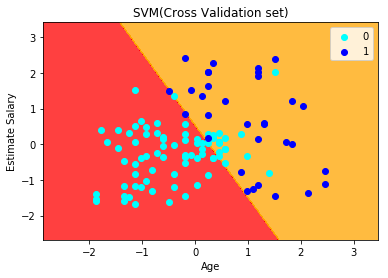

In [23]:
# cross validation        
def Cross_validation():
    # load pickle file
    file1 = open('SVM.pkl', 'rb')
    classifier1 = pickle.load(file1)

    # y_prediction ( cross validation) 
    y_predicted1 = obj_util.y_prediction(x_crossval, classifier1)
    print("\n\n y_prediction:",y_predicted1)
    
    print(y_crossval.shape, y_predicted1.shape)
    
    # calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_predicted1, y_crossval)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_crossval, y_predicted1)
    print("\n\nConfusion Matrix:\n",cm)
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_crossval, y_predicted1))
    
    # data visualisation
    obj_util.visualization(x_crossval, y_crossval, classifier1, "SVM(Cross Validation set)", "Age", "Estimate Salary")
    
Cross_validation()
